# Data Science Homework 3

#### Name: Intekhab Naser
#### ID: ZC11577
##### email: intek1@umbc.edu
######################################################################################################################

### Importing required libraries and loading MNIST Data and Labels

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from csv import reader

# alpha = 0.001

dataset = []
labels = []
datafile = "mnist_data.txt"
labelfile = "mnist_labels.txt"

data = open(datafile, "r")
read_data = data.readlines()

X = []
for line in read_data:
	line = np.asarray(list(map(int,line.split())))
	X.append(line)

max_pixel = 255.0
X = np.asarray(X)
X = X/max_pixel
X = X.T
print("Shape of X-transpose: ", X.shape)

# W = np.random.normal(0,0.1, (X.shape[1], 1))

labels = open(labelfile, "r")
read_labels = labels.readlines()

Y = []
for line in read_labels:
    if int(line) == 8:
        Y.append(np.asarray(1))
    else:
        Y.append(np.asarray(0))

Y = np.asarray(Y)
Y = Y.reshape(1, Y.shape[0])
print("Shape of Y", Y.shape)

Shape of X-transpose:  (784, 10000)
Shape of Y (1, 10000)


### Defining Logistic Regression class and respective methods required for the same.

In [128]:
class LogisticRegression():
    
    def __init__(self,num_iterations, learning_rate, lam):
        self.num_iterations = num_iterations
        self.lr = learning_rate
        self.lam = lam
        
    def get_weight(self):
        return self.W
        
    def sigmoid(self,z):
        s = 1.0 / (1.0 + np.exp(-z))
        return s
    
    def initialize(self,dim):
        self.W = np.zeros((dim,1))
#         self.W = np.random.normal(0,1,(dim,1))
#         self.W = np.ones((dim,1))

        b = 0
        assert (self.W.shape == (dim,1))
        
        return self.W, b
    
    def log_likelihood(self,W,b,X,Y):
        m = X.shape[1]
        z = np.dot(W.T,X)+b
        Y_hat = self.sigmoid(z)
        ll = -1.0/m*np.sum(Y*np.log(Y_hat)+(1.0-Y)*np.log(1.0-Y_hat)) - self.lam/2.0 * np.dot(W.T,W)
        ll = np.squeeze(ll)
        return ll
    
    def gradient(self,W,b,X,Y):
        m = X.shape[1]
        z = np.dot(W.T,X) + b
        Y_hat = self.sigmoid(z)
        
        dw = 1.0/m*(np.dot(X, (Y_hat-Y).T) + np.dot(self.lam ,W) )
        db = 1.0/m*np.sum(Y_hat-Y)
        
        return dw, db
    
    def regression(self,W,b, X, Y, epochs, alpha):
        costs = []
        for i in range(epochs):
            dw, db = self.gradient(W,b,X,Y)
            ll = self.log_likelihood(W,b,X,Y)

            W = W - alpha * dw
            b = b - alpha * db

            if i % 100 == 0:
                costs.append(ll)
        return W,b,costs
    
    def predict(self, W,b,X):
        m = X.shape[1]
        Y_pred = np.zeros((1,m))
        self.W = W.reshape(X.shape[0],1)

        A = self.sigmoid(np.dot(W.T, X)+b)

        for i in range(A.shape[1]):
            if (A[:,i] > 0.5): 
                Y_pred[:, i] = 1
            elif (A[:,i] <= 0.5):
                Y_pred[:, i] = 0

        assert (Y_pred.shape == (1,m))

        return Y_pred
    
    def fit(self, X_train, Y_train):
        W, b = self.initialize(X_train.shape[0])
        W,b,cost = self.regression(W,b,X_train,Y_train,self.num_iterations, self.lr)
        Y_pred = self.predict(W,b,X_train)
        
        accuracy = 100.0 - np.mean(np.abs(Y_pred-Y_train)*100.0)
        return accuracy

### Creating Logistic Regression object for 1K epochs with 0.05 learning rate

In [129]:
logistic_regression = LogisticRegression(1000,0.05, 0.1)
accuracy = logistic_regression.fit(X, Y)
weight = logistic_regression.get_weight()
accuracy

94.74

### From above, we can see that the training set accuracy on the 8-vs-others classification is  '94.74'
=================================================================================================================

In [130]:
weight = weight.reshape(28,28)
print(weight)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00 -8.62221654e-05 -5.35485027e-04 -3.58502688e-04
  -5.64053900e-04 -4.59253119e-04 -4.62055737e-04 -1.57664721e-03
  -3.14067997e-03 -2.22377520e-03 -2.69570525e-03 -2.08554901e-03
  -5.64595238e-04 -1.28192875e-03 -1.89656058e-03 -8.02895436e-05
  -3.09705796e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.000

### Now, plotting the graph for weight vector:

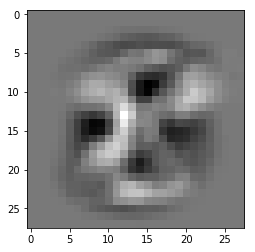

In [131]:
plt.imshow(weight, cmap='gray')

#### From above plot of weight vector, we can see that it makes a pattern of '8'. By comparing the weight vector values with the corresponding plot, the largest weight (positive values) are mapping to black pixels, the smallest values (negative values) are mapping to white pixels and the values in between (mostly zeroes) are mapping to greyish pixels. Thus, as the pattern matches the number eight, these calculated values of weight vector can recognize the number 8.

In [132]:
lambd = [0, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000, 5000, 10000]
acc = []
for l in lambd:
    logistic_regression = LogisticRegression(1000,0.05,l)
    acc.append(logistic_regression.fit(X, Y))

In [133]:
acc

[94.74,
 94.74,
 94.74,
 94.74,
 94.74,
 94.74,
 94.73,
 94.72,
 94.7,
 94.71,
 94.63,
 94.52,
 93.57,
 92.22,
 90.26,
 90.26]

### These are the values of training set accuracy for increasing values of lambda.

([<matplotlib.axis.XTick at 0x2a08153a320>,
 <a list of 16 Text xticklabel objects>)

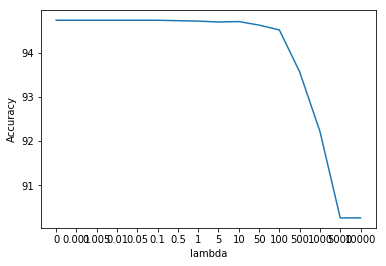

In [134]:
plt.plot(range(len(acc)),acc)
plt.xlabel('lambda')
plt.ylabel('Accuracy')
plt.xticks(np.arange(len(acc)), lambd)

### This is the curve of training set accuracy as a function of lambda with increasing regularizer values.
### Here, we can see that as the value of regularizer (lambda) increases, the penalty is higher and the accuracy takes a hit.